In [1]:
import gymnasium as gym
from gymnasium.wrappers.jax_to_numpy import JaxToNumpy
from gymnasium.wrappers.vector import JaxToNumpy as VJaxToNumpy
from solarcarsim.simv1 import SolarRaceV1
from stable_baselines3.common.env_checker import check_env
from gymnasium.utils.env_checker import check_env as gym_check_env
env = SolarRaceV1()
wrapped_env = JaxToNumpy(env)

In [2]:
env.reset()
check_env(wrapped_env)
gym_check_env(wrapped_env)

/home/saji/Documents/Code/solarcarsim/.venv/lib/python3.12/site-packages/stable_baselines3/common/env_checker.py:271: UserWarning: Your observation wind has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(
/home/saji/Documents/Code/solarcarsim/.venv/lib/python3.12/site-packages/gymnasium/utils/env_checker.py:384: UserWarning: WARN: The environment (<JaxToNumpy<SolarRaceV1 instance>>) is different from the unwrapped version (<SolarRaceV1 instance>). This could effect the environment checker as the environment most likely has a wrapper applied to it. We recommend using the raw environment for `check_env` using `env.unwrapped`.
  logger.warn(
/home/saji/Documents/Code/solarcarsim/.venv/lib/python3.12/site-packages/gymnasium/utils/env_checker.py:434: UserWarning: WARN: Not able to test alternative render modes due to the environment not havi

In [3]:
# import a model and try it out!
from sbx import TD3
model = TD3("MultiInputPolicy", env, verbose=1)
model.learn(total_timesteps=30_000)


/home/saji/Documents/Code/solarcarsim/.venv/lib/python3.12/site-packages/stable_baselines3/common/buffers.py:605: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 80.85GB > 53.66GB
  warnings.warn(


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


KeyboardInterrupt: 

In [4]:
vec_env = model.get_env()
import matplotlib.pyplot as plt
import jax.numpy as jnp
obs = vec_env.reset()
actions = []
obs_list = []
rewards = []
for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    actions.append(action)
    obs, reward, done, info = vec_env.step(action)
    obs_list.append(obs)
    rewards.append(reward)

    
    # VecEnv resets automatically
    if done:
        break
    #   obs = vec_env.reset()

position = jnp.array([x['position'] for x in obs_list]).flatten()
energy = jnp.array([x['energy'] for x in obs_list]).flatten()
actions = jnp.array(actions).flatten()

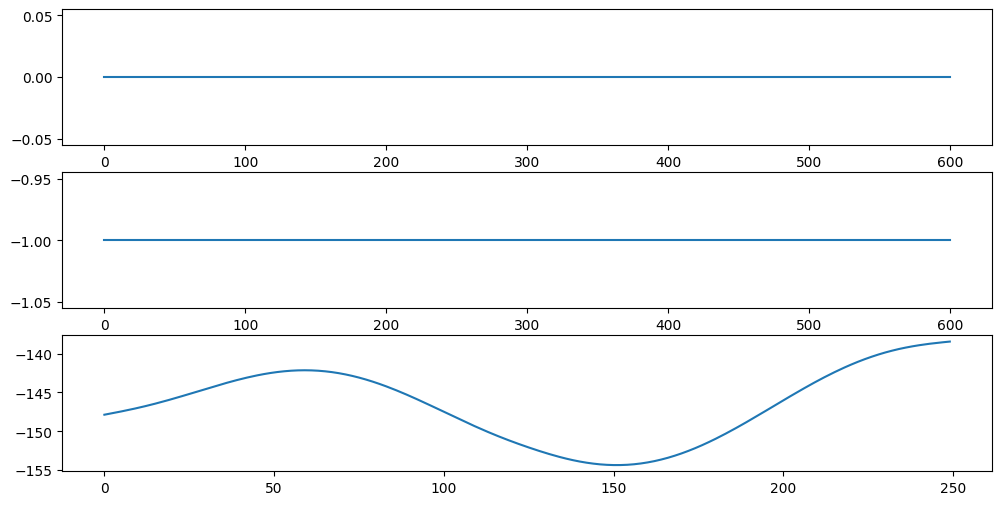

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,6))
ax1.plot(position, label="position")
ax2.plot(actions, label="energy")
ax3.plot(rewards[0:250])
# plt.legend()

In [6]:
actions

Array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1